# check ollama

In [1]:
import subprocess

def run_ollama_llava(prompt):
    """
    Function to run ollama with the llava model and the given prompt.
    """
    # Command to run ollama with llava
    command = ['ollama', 'run', 'llava']
    
    # Run the command and capture the output
    process = subprocess.Popen(command, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    stdout, stderr = process.communicate(input=prompt)
    
    if process.returncode != 0:
        print(f"Error running ollama: {stderr}")
        return None
    
    return stdout

# Example usage
if __name__ == "__main__":
    prompt = "Your input prompt here"
    result = run_ollama_llava(prompt)
    
    if result:
        print("Ollama llava output:")
        print(result)
    else:
        print("Failed to get output from ollama llava.")


Ollama llava output:
 Sure, I can provide you with information or guidance on a variety of topics. Please let me know what you would like to know or discuss, and I will do my best to assist you. 




# Langchain - ollama

In [2]:
# !pip install langchain-community

In [3]:
from langchain_community.llms import Ollama

llm = Ollama(
    model="llava"
)  # assuming you have Ollama installed and have llama3 model pulled with `ollama pull llama3 `

llm.invoke("Tell me a joke")

' Why did the tomato turn red? Because it saw the salad dressing! '

https://python.langchain.com/v0.1/docs/modules/data_connection/retrievers/vectorstore/

# LangChain <--> Knowledge Vector <--> Retraival <--> Ollama

In [4]:
import os
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import LLMChain
from langchain_community.llms import Ollama

# Initialize the Ollama LLM
llm = Ollama(
    model="llava"
)

# Initialize the Hugging Face text embedding model
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

/home/dlb/anaconda3/envs/langchain-rag/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 0.3.0. An updated version of the class exists in the langchain-huggingface package and should be used instead. To use it run `pip install -U langchain-huggingface` and import as `from langchain_huggingface import HuggingFaceEmbeddings`.
  warn_deprecated(
/home/dlb/anaconda3/envs/langchain-rag/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [5]:

# Define a function to read and process the text file
def read_patient_records(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    records = content.strip().split('\n\n')
    return records

# Define the path to the text file containing patient records
file_path = 'patient_records.txt'

# Read and process the patient records
patient_records = read_patient_records(file_path)


In [6]:
patient_records

['Patient Name: Emily Davis\nHospital Name: Green Valley Clinic\nDescription of Sickness: Fever and cough, possible flu\nDoctor Name: Dr. Baker\nTotal Cost to Pay: $300',
 'Patient Name: Jane Smith\nHospital Name: Green Valley Clinic\nDescription of Sickness: Stomach pain, suspected appendicitis\nDoctor Name: Dr. Davis\nTotal Cost to Pay: $800',
 'Patient Name: Chris Brown\nHospital Name: Green Valley Clinic\nDescription of Sickness: Chest pain, possible heart condition\nDoctor Name: Dr. Adams\nTotal Cost to Pay: $800',
 'Patient Name: Chris Brown\nHospital Name: Metro General Hospital\nDescription of Sickness: Stomach pain, suspected appendicitis\nDoctor Name: Dr. Baker\nTotal Cost to Pay: $800',
 "Patient Name: Emily Davis\nHospital Name: St. Mary's Hospital\nDescription of Sickness: Chest pain, possible heart condition\nDoctor Name: Dr. Davis\nTotal Cost to Pay: $1200"]

In [7]:

# Create a FAISS vector store from the texts using the embedding model
vector_store = FAISS.from_texts(texts=patient_records, embedding=embedding_model)


In [8]:
import os
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain_community.llms import Ollama

# Initialize the Ollama LLM
llm = Ollama(
    model="llava"
)

# Initialize the Hugging Face text embedding model
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

# Define a function to read and process the text file
def read_patient_records(file_path):
    with open(file_path, 'r') as file:
        content = file.read()
    records = content.strip().split('\n\n')
    return records

# Define the path to the text file containing patient records
file_path = 'patient_records.txt'

# Read and process the patient records
patient_records = read_patient_records(file_path)

# Create a FAISS vector store from the texts using the embedding model
vector_store = FAISS.from_texts(texts=patient_records, embedding=embedding_model)

# Define a function to retrieve relevant documents and process them with the LLM
def retrieve_and_process(query):
    # Retrieve documents related to the query
    retrieved_docs = vector_store.similarity_search(query, k=3)  # k is the number of documents to retrieve
    
    # Combine the retrieved documents' content
    combined_docs_content = " ".join([doc.page_content for doc in retrieved_docs])
    
    # Create a prompt template
    prompt_template = PromptTemplate(
        template="{context}\n\nQuestion: {query}\nAnswer:",
        input_variables=["context", "query"]
    )
    
    # Create a chain with the LLM
    chain = LLMChain(
        llm=llm,
        prompt=prompt_template
    )
    
    # Run the query through the chain with the combined document content
    result = chain.run(context=combined_docs_content, query=query)
    
    return result

In [9]:
# Example query
query = "is there any patient name shafi"
result = retrieve_and_process(query)
print(result)


/home/dlb/anaconda3/envs/langchain-rag/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use RunnableSequence, e.g., `prompt | llm` instead.
  warn_deprecated(
/home/dlb/anaconda3/envs/langchain-rag/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


 No, there is no patient named Shafi in the list provided. 


In [62]:
# Example query
query = "is there any patient name Emily Brown"
result = retrieve_and_process(query)
print(result)


 No, there is no patient named "Emily Brown" in the given list of patients. The correct patient names are Emily Davis and Chris Brown. 


In [60]:
# Example query
query = "which hospital has highest cost , share the document id"
result = retrieve_and_process(query)
print(result)

 The hospital with the highest cost is St. Mary's Hospital. 


In [61]:
# Example query
query = "Can you share the address of any hospital good for chest pain"
result = retrieve_and_process(query)
print(result)

 Yes, I can provide the address of a hospital that is good for treating chest pain. St. Mary's Hospital, which is where Emily Davis was treated for her chest pain, could be a good option. The address of St. Mary's Hospital is not provided in the image, but it may be possible to find the address through an online search using the hospital's name. 


# Multi-Model

https://python.langchain.com/v0.2/docs/integrations/llms/ollama/

In [10]:
# !ollama pull bakllava

In [11]:
# !pip install pillow

In [12]:
from langchain_community.llms import Ollama

bakllava = Ollama(model="bakllava")


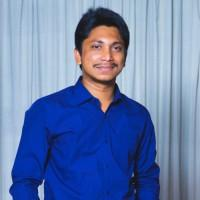

In [13]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string

    """
    if pil_image.mode == 'RGBA':
        pil_image = pil_image.convert('RGB')

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "./1576591134140.jpeg"

pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [14]:
llm_with_image_context = bakllava.bind(images=[image_b64])

In [15]:
llm_with_image_context.invoke("What is  color of shirt")

' The color of the shirt is blue.'

In [16]:
llm_with_image_context.invoke("what is the gender of this person")

' Male'


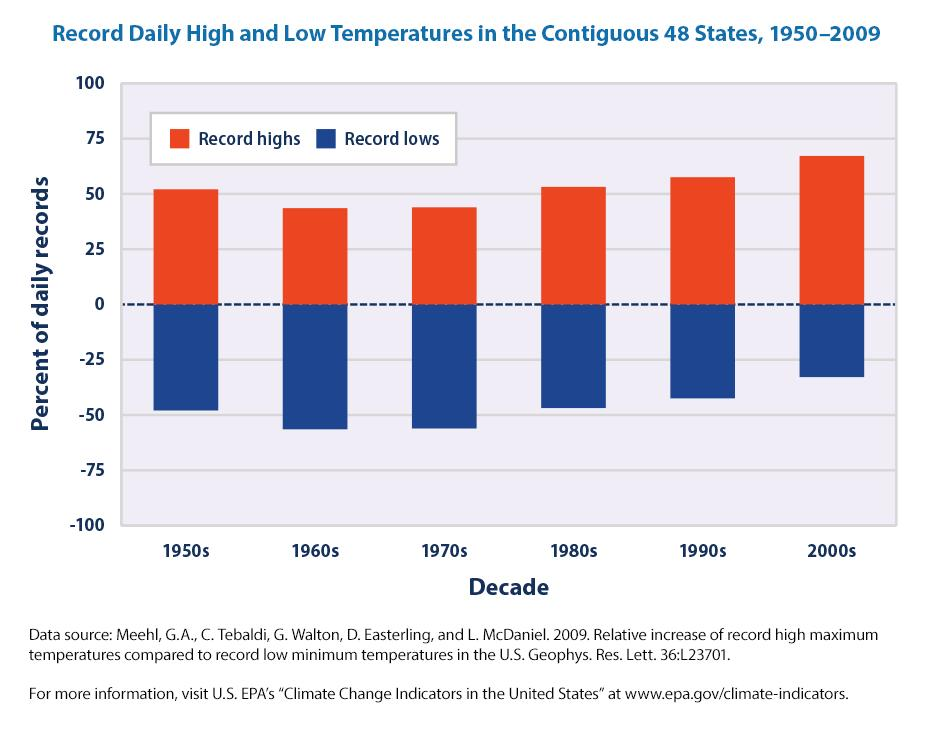

'2015 has the highest temperature among all years given in the image.'

In [14]:
file_path = "high-low-temps_download5_2021.jpg"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)
llm_with_image_context.invoke("which year has highest temparare? ")